# ApI project zomato


### The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

## Imports needed

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

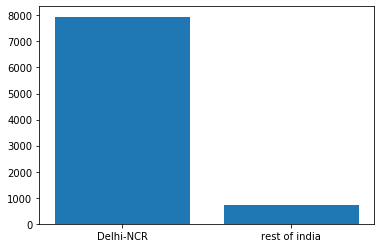

In [43]:
df1 = pd.read_csv('C:/Users\itzone\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)/zomato.csv',encoding = 'iso-8859-1')
df=df1.copy()
def changes (s):
    if s=='New Delhi' or s=='Ghaziabad'or s=='Noida'or s=='Gurgaon'or s=='Faridabad':
        return 'Delhi-NCR'
    else:
        return 'Rest of India'
df['region']=df[df['Country Code']==1].City.apply(changes)
df_country_india=df[df['Country Code']==1]
total_count=df_country_india.groupby('region').size()
## ttotal_count[0] count of resturant present in  rest of india
##  ttotal_count[1]  count of resturant present in  Delhi NCR
names=['Delhi-NCR','rest of india']
count=[total_count[0],total_count[1]]
plt.bar(names,count)
plt.show()


## Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset


In [153]:
df_rest=df_country_india[df_country_india['region']=='Rest of India'].copy(deep=True)
df_ncr=df_country_india.loc[df_country_india['region']=='Delhi-NCR'].copy(deep=True)
rest_In1=set()
Delhi_ncr1=set()
for s in df_rest['Cuisines']:
    cusine=s.strip().split(',')
    for i in cusine:
        rest_In1.add(i)

for s in df_ncr['Cuisines']:
    cusine=s.strip().split(',')
    for i in cusine:
            Delhi_ncr1.add(i)
Not_present_in_ncr=rest_In1.difference(Delhi_ncr1)
Not_present_in_ncr


{' BBQ',
 ' Cajun',
 ' German',
 ' Steak',
 'Andhra',
 'Charcoal Grill',
 'Indian',
 'Malwani',
 'Tex-Mex'}

## Now we chk in Api whether above cuisines not served in NCR or it is due to incomplete dataset

In [45]:
import requests
res = requests.get('https://developers.zomato.com/api/v2.1/cuisines', headers={'user-key':'f3f7015d6d6567621c5086766efa3825'},
                   params={'city_id':1})
py_data = res.json()
for i in py_data['cuisines']:
    ncr_cuis_from_api = i['cuisine']['cuisine_name'].strip()
    if ncr_cuis_from_api in Not_present_in_ncr:
        print(ncr_cuis_from_api,'is servered in NCR')
        
print("-------------------------------------")
print('There is lack of data in CSV file as there are some Cuisines which are served by Delhi-NCR restaurant which according to data in CSV files are not')

Andhra is servered in NCR
Malwani is servered in NCR
Tex-Mex is servered in NCR
-------------------------------------
There is lack of data in CSV file as there are some Cuisines which are served by Delhi-NCR restaurant which according to data in CSV files are not


# Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [46]:
from heapq import nlargest 
rest_In={}
Delhi_ncr={}
for s in df_rest['Cuisines']:
    cusine=s.strip().split(',')
    for i in cusine:
        if i not in rest_In:
            rest_In[i]=1
        else :
            rest_In[i]=rest_In[i]+1
for s in df_ncr['Cuisines']:
    cusine=s.strip().split(',')
    for i in cusine:
        if i not in Delhi_ncr:
            Delhi_ncr[i]=1
        else:
            Delhi_ncr[i]=Delhi_ncr[i]+1

Top_10_Delhi_ncr= nlargest(10, Delhi_ncr, key = Delhi_ncr.get) 

Top_10_rest_In = nlargest(10, rest_In, key = rest_In.get)
print("TOP 10 Cusines in Delhi-Ncr")
for val in Top_10_Delhi_ncr: 
    print(val) 
print("TOP 10 Cusines in rest_In")
for val in Top_10_rest_In: 
    print(val) 


TOP 10 Cusines in Delhi-Ncr
North Indian
 Chinese
 Fast Food
 North Indian
Chinese
 Mughlai
Fast Food
Bakery
Cafe
 Desserts
TOP 10 Cusines in rest_In
North Indian
 Chinese
 Continental
 North Indian
 Italian
Cafe
 Fast Food
Continental
Chinese
 Mughlai


## Below pie chart shows variety of cusine served in Delhi-NCR Vs rest of india by seeing this 
 data we can suggest  tourist  that staying in Delhi-NCR is more benefical

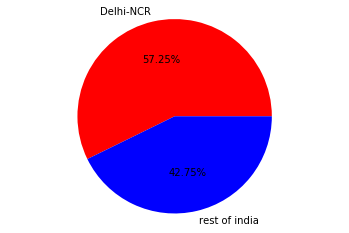

In [47]:
len(rest_In1)
len(Delhi_ncr1)
size=[len(Delhi_ncr1),len(rest_In1)]
names=['Delhi-NCR','rest of india']
colors=['red','blue']
plt.pie(size, colors=colors,labels = names, autopct="%.2f%%")
plt.axis('equal')
plt.show()

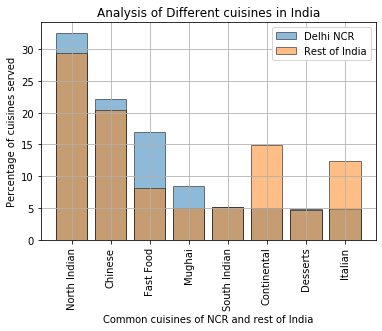

In [138]:
"""
 Now we compare cuisines which are common in top 10 cuisines served in Delhi NCR and Rest of India
     North Indian
     Chinese
     Fast Food
     Mughai
     South Indian
     Continental
     Desserts
     Italian
"""

def get_percent(total,element):
    return (element/total*100);

Del=[3597,2448,1866,933,569,547,542,535]
Rest=[349,242,97,59,62,177,55,147]
SumDel=sum(Del)
SumRest=sum(Rest)

ncr_percentage, rest_percentage = [], []
for i in range(8):
    ncr_percentage.append(get_percent(SumDel,Del[i]))
    rest_percentage.append(get_percent(SumRest,Rest[i]))

label=['North Indian','Chinese', 'Fast Food', 'Mughai', 'South Indian','Continental','Desserts', 'Italian']
plt.bar(label, ncr_percentage, edgecolor = "black", alpha = 0.5, label = 'Delhi NCR')
plt.bar(label, rest_percentage,edgecolor = "black", alpha = 0.5, label = 'Rest of India')
plt.title('Analysis of Different cuisines in India')
plt.xlabel('Common cuisines of NCR and rest of India')
plt.ylabel('Percentage of cuisines served')
plt.xticks(label, rotation = 90)
plt.grid()
plt.legend()
plt.show()
plt.show()

##  Q 2 :User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

## Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.

1.Number of Votes given Restaurant

2.Restaurant serving more number of cuisines.

3.Average Cost of Restaurant

4.Restaurant serving some specific cuisines.


## Number of Votes given Restaurant

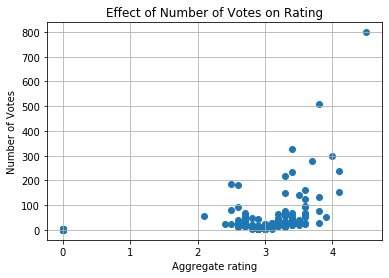

In [48]:
np_votes=np.array(df_ncr['Votes'])
np_rating=np.array(df_ncr['Aggregate rating'])
plt.scatter(np_rating[:270],np_votes[:270])
plt.ylabel('Number of Votes')
plt.xlabel('Aggregate rating')
plt.title('Effect of Number of Votes on Rating')
plt.grid()
plt.show()


## Restaurant serving more number of cuisines

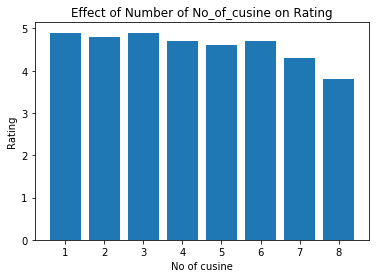

In [49]:
def No_of_cusine(s):
    lists=s.strip().split(',')
    return len(lists)
df_ncr['No of cusine']=df_ncr.Cuisines.apply(No_of_cusine)
np_No_of_cusine=np.array(df_ncr['No of cusine'])
np_rating=np.array(df_ncr['Aggregate rating'])
plt.bar(np_No_of_cusine,np_rating)
plt.ylabel('Rating')
plt.xlabel('No of cusine')
plt.title('Effect of Number of No_of_cusine on Rating')
plt.show()

## Average Cost of Restaurant

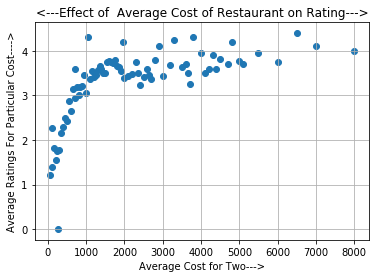

In [50]:
df_ncr
np_Average_Cost=np.array(df_ncr['Average Cost for two'])
unique_cost = np.unique(np_Average_Cost)
unique_cost.sort()
avg_ratings = []
user_cost = []
for c in unique_cost:
    index = np.where(np_Average_Cost==c)
    user_cost.append(c)
    avg_ratings.append(np.mean(np_rating[index]))
plt.scatter(user_cost,avg_ratings)
plt.ylabel('Average Ratings For Particular Cost---->')
plt.xlabel('Average Cost for Two--->')
plt.title('<---Effect of  Average Cost of Restaurant on Rating--->')
plt.grid()
plt.show()

## Restaurant serving some specific cuisines.

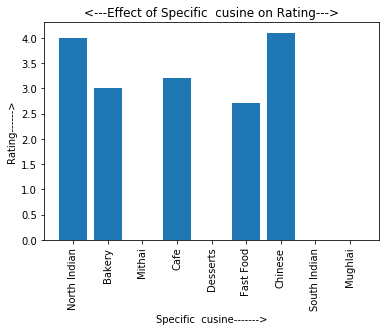

In [51]:
specific_cusine=df_ncr[df_ncr['No of cusine']==1 ]
np_name=np.array(specific_cusine['Cuisines'][0:25])
np_rating=np.array(specific_cusine['Aggregate rating'][0:25])
np_rating
plt.bar(np_name,np_rating)
plt.ylabel('Rating------>')
plt.xlabel('Specific  cusine------->')
plt.title('<---Effect of Specific  cusine on Rating--->')
plt.xticks(rotation=90)
plt.show()

## Q 2.2) Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?
Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

Top 10 localities with more weighted restaurant rating...
Aminabad  -  4.9
Hotel Clarks Amer, Malviya Nagar  -  4.9
Friends Colony  -  4.89
Powai  -  4.84
Kirlampudi Layout  -  4.82
Deccan Gymkhana  -  4.8
Express Avenue Mall,  Royapettah  -  4.8
Banjara Hills  -  4.72
Sector 5, Salt Lake  -  4.71
Riverside Mall, Gomti Nagar  -  4.7


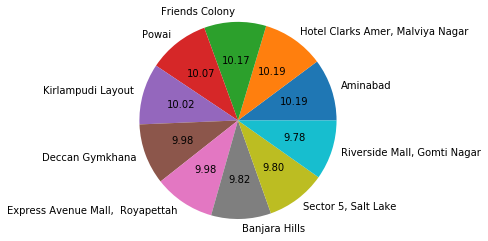

In [63]:
local = dict()
vote = dict()
for i in df_country_india.index:
    key = df_country_india['Locality'][i]
    if key in local:
        local[key] += round(df_country_india['Votes'][i]*df_country_india['Aggregate rating'][i], 2)
        vote[key] += df_country_india['Votes'][i]
    else:
        local[key] = round(df_country_india['Votes'][i]*df_country_india['Aggregate rating'][i], 2)
        vote[key] = df_country_india['Votes'][i]
for key in local:
    if local[key] == 0 or vote[key] == 0:
        continue
    local[key] = round(local[key]/vote[key], 2)
        
wr = list(local.items())
wr.sort(key = lambda x: x[1])
wr = wr[::-1]

locality,w_r = [],[]
print('Top 10 localities with more weighted restaurant rating...')
for i in range(10):
    print(wr[i][0], ' - ', wr[i][1])
    locality.append(wr[i][0])
    w_r.append(wr[i][1])

plt.pie(w_r, labels=locality, autopct='%.2f')
plt.axis("equal")
plt.show()


# Visualization


# Plot the bar graph top 15 restaurants have a maximum number of outlets.

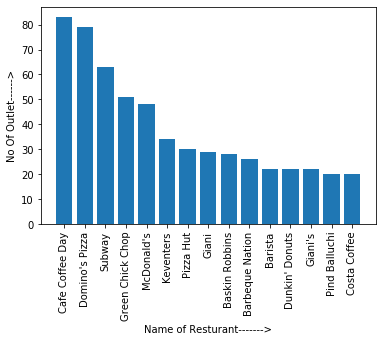

In [74]:
names=df['Restaurant Name'].value_counts().index[:15]
values=df['Restaurant Name'].value_counts().values[:15]
plt.bar(names,values)
plt.ylabel('No Of Outlet------>')
plt.xlabel('Name of Resturant------->')
plt.xticks(rotation=90)
plt.show()

# Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

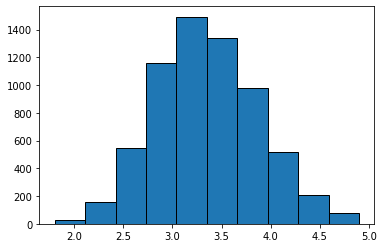

In [75]:
_ratings = []
def get_ratings(agg_r):
    if pd.isnull(agg_r) or agg_r==0.0:
        pass
    else:
        _ratings.append(agg_r)
df_country_india['Aggregate rating'].apply(get_ratings)

plt.hist(_ratings, edgecolor='black')
plt.show()

# Plot the bar graph top 10 restaurants in the data with the highest number of votes.

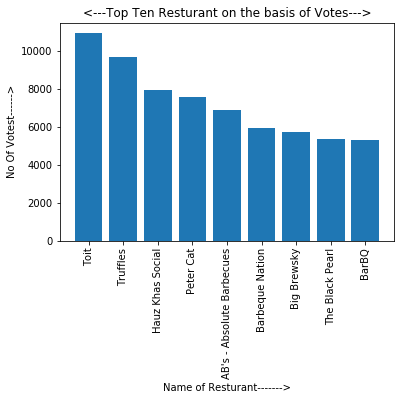

In [89]:
top_10=df_country_india.nlargest(10,'Votes')
resturant_name=[]
votes_10=[]
resturant_name
for i in top_10['Restaurant Name']:
    resturant_name.append(i)
for i in top_10['Votes']:
    votes_10.append(i)

plt.bar(resturant_name,votes_10)
plt.ylabel('No Of Votest------>')
plt.xlabel('Name of Resturant------->')
plt.title('<---Top Ten Resturant on the basis of Votes--->')
plt.xticks(rotation=90)
plt.show()

# Plot the pie graph of top 10 cuisines present in restaurants in the USA.

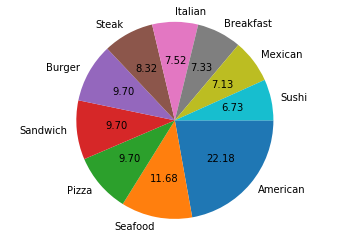

In [136]:
df2=df1.copy()
df2
df_USA=df2[df2['Country Code']==216]
cuisines_freq = {}
def get_cuis(cuisines):
    if pd.isnull(cuisines) or cuisines=='':
        pass
    else:
        cuis_lst = [cus.strip() for cus in cuisines.strip().split(',')]
        for c in cuis_lst:
            cuisines_freq[c] = cuisines_freq.get(c,0) + 1

df_USA['Cuisines'].apply(get_cuis)

c_list = list(cuisines_freq.items())
c_list.sort(key=lambda x:x[1])
c_list = c_list[::-1]

cuis_name = []
freq = []
for i in range(10):
    cuis_name.append(c_list[i][0])
    freq.append(c_list[i][1])

plt.pie(freq, labels=cuis_name, counterclock=False, autopct="%.2f")
plt.axis("equal")
plt.show()

# Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.


### Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) 

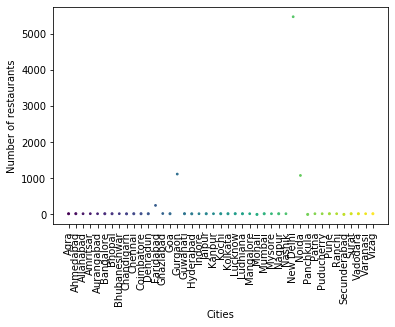

In [146]:
df_cities = df_country_india.groupby('City')
cities, num_restaurants, weighted_rating = [], [], []

for city, df_city in df_cities:
    cities.append(city)
    num_restaurants.append(len(df_city))
    
    temp = df_cities.get_group(city).copy(deep=True)
    temp['r'] = temp['Aggregate rating']*temp['Votes']
    w = (temp['r'].sum() / temp['Votes'].sum())

    weighted_rating.append(int(w))

colors = np.arange(len(cities))
plt.scatter(cities, num_restaurants, s=weighted_rating, c=colors)
plt.xticks(rotation=90)
plt.xlabel('Cities')
plt.ylabel('Number of restaurants')
plt.show()